## An investigative crime comparision between Chicago and Los Angeles

*Navigating Urban Realities: A Comprehensive Analysis of Crime Dynamics in Chicago and Los Angeles, Unveiling Patterns, Trends, and Hotspots*

### Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#chicago_dataset">Chicago Dataset</a></li>
    <li><a href="#la_dataset">Los Angeles Dataset</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#limits">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction:

In a quest to delve into the intricacies of public safety and law enforcement, this data analysis project sets out to explore crime data from two major cities – Chicago and Los Angeles. By examining patterns, trends, and disparities in crime rates, we aim to contribute valuable insights that can inform discussions on law enforcement strategies, community safety, and policy interventions.

### Objectives

1. **Crime Rate Comparison:**
    - Investigate and compare the overall crime rates between Chicago and Los Angeles over the specified period.

2. **Trend Analysis:**

    - Uncover trends in specific types of crimes, identifying patterns of increase or decrease over the years.

3. **Hotspots:**

    - Utilize spatial analysis to identify and map crime hotspots in both cities, discerning areas with consistently high crime rates.

### Methodology:

Employing a combination of statistical analysis, data visualization techniques, and spatial mapping, this analysis ensures a comprehensive exploration of crime data. The datasets undergo meticulous cleaning, standardization, and thorough examination to establish a robust foundation for investigation. Through time-series analysis, crime category trends, and hotspot mapping, the objective is to extract actionable insights for enhancing public safety.

### Significance:

This project holds significance in shedding light on crime dynamics, offering a nuanced understanding of patterns and trends in two diverse urban landscapes. By addressing specific objectives related to crime rate comparisons, trend analyses, and hotspot identification, the aim is to provide valuable information for policymakers, law enforcement agencies, and communities to collaboratively work towards safer environments.

Our commitment is rooted in delivering a data-driven analysis characterized by integrity, statistical rigor, and a dedication to uncovering insights that contribute to informed decision-making in matters of public safety and law enforcement.

To begin the analysis, I will import essential packages, including Pandas, NumPy, and Matplotlib.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.figure
import requests
import folium 
from folium.plugins import HeatMap 
from IPython.display import IFrame 

<a id='wrangling'></a>
### Data Wrangling

Below I will create a versatile function that allows me to inspect essential information from the dataframe, facilitating a comprehensive understanding of the necessary cleaning and manipulation tasks. This function efficiently captures the dataframe's shape, identifies duplicated rows, and provides general information using .info(), minimizing the need for redundant calculations. The resulting variable, named 'display_dataframe_properties,' prints key properties such as shape, duplicated rows count, data types, and missing values for each column.

In [16]:
def display_dataframe_properties(df): 
    ''' 
    INPUT: 
    df (DataFrame) - dataframe to display properties 
    OUTPUT: 
    Print key properties of the dataframe: shape, duplicated rows count, 
    data types, and missing values for each column. 
    ''' 
    # Calculate the shape and number of duplicated rows once 
    shape_info = f'Shape: {df.shape}'
    duplicated_info = f'Duplicated rows: {sum(df.duplicated())}'
    
    # Data types and missing values for each column 
    info_str = df.info() 
    
    # Print the information 
    print(shape_info) 
    print(duplicated_info) 
    print(info_str) 
    print('\n') 

<a id='chicago_dataset'></a>
##### Lets begin exploring the Chicago dataframe

In [17]:
# load data from comma-seperated values spreadsheet into a dataframe
# Add a city column
df_chi = pd.read_csv('chicago_crime_data.csv')
df_chi['City'] = 'Chicago'
df_chi.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,City
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN,Chicago
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,Chicago
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,Chicago
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,Chicago
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN,Chicago


In [18]:
display_dataframe_properties(df_chi)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968984 entries, 0 to 7968983
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
 22  City                  object 
dtypes: bool

**The Chicago dataset spans from 2020 to the present year, 2023, comprising nearly 8 million rows of data. Although the dataframe is generally well-formatted, I've identified a few issues that require attention:** 

First, there are several columns irrelevant to the posed questions, which I plan to drop. Additionally, the 'Date' column needs conversion to the datetime format, with the time portion being subsequently removed. Given the dataset's substantial size, exceeding 1 GB, I intend to optimize memory usage by converting certain columns into categorical data types.

As for the LA dataset, covering the years 2020 to 2023, we can exclude all Chicago dataset years preceding 2020. Afterward, I'll sort the dataframe by the 'Date' column. Upon completing these steps, I aim to save a new version of the dataframe to segregate and secure the data from the original one. This new dataframe is expected to be significantly smaller, enhancing overall ease of handling and analysis.

In [19]:
# dropping the following columns
df_chi = df_chi.drop(['ID','Case Number','IUCR','Arrest','Domestic','Beat','Ward','Community Area',
                      'FBI Code','X Coordinate','Y Coordinate','Updated On','Location'], axis=1)

In [20]:
# convert 'Date' column to datetime format, drop the 'hh/mm/ss am/pm' portion of each value then confirm with .info()
# dropping the time column will also make our data more tidy because it isn't needed
df_chi['Date'] = pd.to_datetime(df_chi['Date'], format='%m/%d/%Y %I:%M:%S %p').dt.normalize()
df_chi.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7968984 entries, 0 to 7968983
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
7968984 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 60.8 MB


In [21]:
df_chi.head(1)

,Date,Block,Primary Type,Description,Location Description,District,Year,Latitude,Longitude,City
0,2015-03-18,0000X W WACKER DR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,1.0,2015,NaN,NaN,Chicago


Examining the 'Description,' 'Primary Type,' and 'Location Description' columns reveals that converting these object types into categories can significantly enhance memory efficiency. This optimization will consequently lead to improved performance and readability. Additionally, to streamline data interpretation, I propose categorizing values in the 'Location Description' and 'Description' columns into buckets, with the top 30 values retained and any values beyond this threshold grouped into an 'other' bucket.

In [22]:
# the .info method is designed to work on the entire dataframe or one column. I'd like to get a look at the dtype
# and memory usage of both columns so I'll build a variable that includes both columns
selected_columns = ['Primary Type', 'Description', 'Location Description',]
subset_chi_df = df_chi[selected_columns]

# display information about the dataframe
subset_chi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968984 entries, 0 to 7968983
Data columns (total 3 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Primary Type          object
 1   Description           object
 2   Location Description  object
dtypes: object(3)
memory usage: 182.4+ MB


Before converting these columns into categories I need to consoloidate the 'Location Description' and 'Description' columns.

The code below focuses on enhancing the clarity of crime data in the Chicago DataFrame (df_chi). It targets the 'Location Description' and 'Description' columns, aiming to group less common values into a simplified 'Other' category. By identifying the 30 least common values in each column based on frequency counts, the code replaces occurrences of these values with the label 'Other'. This step is a common practice to streamline data for improved analysis and interpretation.

In [23]:
# Identifying the 15 least common values in 'Location Description' and 'description'
location_change = list(df_chi['Location Description'].value_counts()[15:].index)
desc_change = list(df_chi['Description'].value_counts()[15:].index)

# Replacing the identified less common 'Location Description' and 'description' values with 'Other'
df_chi.loc[df_chi['Location Description'].isin(location_change), df_chi.columns=='Location Description'] = 'OTHER'
df_chi.loc[df_chi['Description'].isin(desc_change), df_chi.columns=='Description'] = 'OTHER'

Now lets categorize these columns to optimize memory usage and improve performace

In [24]:
# converting these columns from objects to categories
df_chi['Primary Type'] = df_chi['Primary Type'].astype('category')
df_chi['Description'] = df_chi['Description'].astype('category')
df_chi['Location Description'] = df_chi['Location Description'].astype('category')

In [25]:
# using the same combination method as above to check dtype and memory usage
selected_columns = ['Primary Type', 'Description', 'Location Description',]
subset_chi_df_1 = df_chi[selected_columns]

# display information about the dataframe
subset_chi_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968984 entries, 0 to 7968983
Data columns (total 3 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Primary Type          category
 1   Description           category
 2   Location Description  category
dtypes: category(3)
memory usage: 22.8 MB


Memory usage in these columns has been reduced from 182 MB to only 23 MB.

Lets take a look at how each column was affected using the value_counts method. Reducing these vital columns to buckets of 30 will assist during the analysis phase of this project.

In [26]:
df_chi['Description'].value_counts()

Description
OTHER                           2605374
SIMPLE                           934662
$500 AND UNDER                   644424
DOMESTIC BATTERY SIMPLE          622432
TO VEHICLE                       445114
OVER $500                        429552
TO PROPERTY                      418685
AUTOMOBILE                       310562
FORCIBLE ENTRY                   287125
POSS: CANNABIS 30GMS OR LESS     278135
FROM BUILDING                    258625
RETAIL THEFT                     210202
TELEPHONE THREAT                 152436
TO LAND                          133451
POSS: CRACK                      121109
UNLAWFUL ENTRY                   117096
Name: count, dtype: int64

In [27]:
df_chi['Location Description'].value_counts()

Location Description
STREET                            2081323
OTHER                             1497713
RESIDENCE                         1327993
APARTMENT                          912876
SIDEWALK                           738686
PARKING LOT/GARAGE(NON.RESID.)     202970
ALLEY                              177248
SMALL RETAIL STORE                 152275
SCHOOL, PUBLIC, BUILDING           146375
RESIDENCE-GARAGE                   135530
RESTAURANT                         131001
VEHICLE NON-COMMERCIAL             126677
RESIDENCE PORCH/HALLWAY            124197
DEPARTMENT STORE                   101497
GROCERY FOOD STORE                 100356
Name: count, dtype: int64

Now lets filter based on the years that will match with our LA dataset, then we will sort by the date column and reset the index

In [28]:
year_mask = (df_chi['Year'] >= 2020) & (df_chi['Year'] <=2023)
df_chi = df_chi[year_mask]
df_chi.head()

# sort by date column
df_chi = df_chi.sort_values(by='Date')
df_chi.head()

# reset the index
df_chi = df_chi.reset_index(drop=True)
df_chi.head()

,Date,Block,Primary Type,Description,Location Description,District,Year,Latitude,Longitude,City
0,2020-01-01,005XX N MICHIGAN AVE,THEFT,RETAIL THEFT,SMALL RETAIL STORE,18.0,2020,41.892097,-87.624164,Chicago
1,2020-01-01,122XX S MICHIGAN AVE,ASSAULT,OTHER,STREET,5.0,2020,41.671251,-87.620306,Chicago
2,2020-01-01,014XX W IRVING PARK RD,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,19.0,2020,41.954325,-87.666352,Chicago
3,2020-01-01,130XX S ELLIS AVE,CRIMINAL DAMAGE,TO PROPERTY,OTHER,5.0,2020,41.658144,-87.597579,Chicago
4,2020-01-01,053XX S CAMPBELL AVE,ASSAULT,OTHER,SIDEWALK,9.0,2020,41.796737,-87.686564,Chicago


Lets rename the columns to make them more descriptive.

In [29]:
df_chi.columns = [
    'Date',
    'Address',
    'Crime Type',
    'Crime Description',
    'Location Description',
    'District',
    'Year',
    'Latitude',
    'Longitude',
    'City',
]
df_chi.head(2)

,Date,Address,Crime Type,Crime Description,Location Description,District,Year,Latitude,Longitude,City
0,2020-01-01,005XX N MICHIGAN AVE,THEFT,RETAIL THEFT,SMALL RETAIL STORE,18.0,2020,41.892097,-87.624164,Chicago
1,2020-01-01,122XX S MICHIGAN AVE,ASSAULT,OTHER,STREET,5.0,2020,41.671251,-87.620306,Chicago


<a id='la_dataset'></a>
##### Now lets take a look at the Los Angeles dataset

In [ ]:
# programmatically download a .csv file and save to a local directory
url = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv'
response = requests.get(url)
with open('Crime_Data_from_2020_to_Present_la.csv', mode='wb') as file:
    file.write(response.content)

In [30]:
# load data from comma-seperated values spreadsheet into a dataframe
# Add a column for City
df_la = pd.read_csv('Crime_Data_from_2020_to_Present_la.csv')
df_la['City'] = 'Los Angeles'
df_la.head(1)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,City
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,Los Angeles


In [31]:
display_dataframe_properties(df_la)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862906 entries, 0 to 862905
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           862906 non-null  int64  
 1   Date Rptd       862906 non-null  object 
 2   DATE OCC        862906 non-null  object 
 3   TIME OCC        862906 non-null  int64  
 4   AREA            862906 non-null  int64  
 5   AREA NAME       862906 non-null  object 
 6   Rpt Dist No     862906 non-null  int64  
 7   Part 1-2        862906 non-null  int64  
 8   Crm Cd          862906 non-null  int64  
 9   Crm Cd Desc     862906 non-null  object 
 10  Mocodes         749241 non-null  object 
 11  Vict Age        862906 non-null  int64  
 12  Vict Sex        757597 non-null  object 
 13  Vict Descent    757584 non-null  object 
 14  Premis Cd       862886 non-null  float64
 15  Premis Desc     862398 non-null  object 
 16  Weapon Used Cd  299647 non-null  float64
 17  Weapon Des

**The Los Angeles dataset has over 800,000 rows of data. The issues I have identified that require attention before we can begin our analysis are as follows:**

Like in the Chicago dataset there are several columns that need to be dropped because they do not pertain to the questions we are trying to answer. Like in the Chicago dataset the date column is a string so this will need to be changed to a datetime object, I'll also extract the Year. 

Taking a look at the 'Crm Cd Desc' column it appears this is a combination of the Crime Type and Crime Description column in the Chicago dataset. For my analytics purposes I'll need to build a function to extract keywords from this column to combine them into buckets that better match the Chicago dataset. Some crime types will also need to be renamed so they match each other.

After breaking these into buckets I'll do like in the Chicago dataset and take the top 30 performing types of crime for the analysis. Last I need to rename and reorder the dataset for matching purposes.

In [32]:
# dropping the following columns
df_la = df_la.drop(['DR_NO','Date Rptd','TIME OCC','AREA','AREA NAME','Part 1-2','Crm Cd',
                    'Mocodes','Vict Age','Vict Sex','Vict Descent','Premis Cd','Weapon Used Cd',
                    'Weapon Desc','Status','Status Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4',
                    'Cross Street'], axis=1)

In [33]:
df_la.head(2)

,DATE OCC,Rpt Dist No,Crm Cd Desc,Premis Desc,LOCATION,LAT,LON,City
0,01/08/2020 12:00:00 AM,377,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,1100 W 39TH PL,34.0141,-118.2978,Los Angeles
1,01/01/2020 12:00:00 AM,163,BATTERY - SIMPLE ASSAULT,SIDEWALK,700 S HILL ST,34.0459,-118.2545,Los Angeles


In [34]:
# convert 'Date OCC' column to datetime format, drop the 'hh/mm/ss am/pm' portion of each value then confirm with .info()
# dropping the time column will also make our data more tidy
df_la['DATE OCC'] = pd.to_datetime(df_la['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p').dt.normalize()
df_la['DATE OCC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 862906 entries, 0 to 862905
Series name: DATE OCC
Non-Null Count   Dtype         
--------------   -----         
862906 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.6 MB


Lets add a Year column to match our Chicago dataframe.

In [35]:
# cast to datetime
df_la['DATE OCC'] = pd.to_datetime(df_la['DATE OCC'])
# add a column for Year
df_la['Year'] = df_la['DATE OCC'].dt.year
df_la.head(2)

,DATE OCC,Rpt Dist No,Crm Cd Desc,Premis Desc,LOCATION,LAT,LON,City,Year
0,2020-01-08,377,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,1100 W 39TH PL,34.0141,-118.2978,Los Angeles,2020
1,2020-01-01,163,BATTERY - SIMPLE ASSAULT,SIDEWALK,700 S HILL ST,34.0459,-118.2545,Los Angeles,2020


In [36]:
# define a function to categorize crimes into different buckets
def categorize_crime(x): 
    if 'VEHICLE' in x.upper(): 
        return ['MOTOR VEHICLE THEFT', ''] 
    elif 'SHOPLIFTING' in x.upper():  # Combine SHOPLIFTING into THEFT
        return ['THEFT', 'SHOPLIFTING']
    elif 'INTIMATE PARTNER' in x.upper():  # Change INTIMATE PARTNER to PROSTITUTION
        return ['PROSTITUTION', '']
    elif ' - ' in x: 
        return [x.split(' - ', 1)[0], x.split(' - ', 1)[1]] 
    else: 
        return [x, ''] 
        
df_la[['Primary Crime Type', 'Description']] = df_la['Crm Cd Desc'].apply(categorize_crime).apply(pd.Series) 
df_la['Primary Crime Type'] = df_la['Primary Crime Type'].apply(lambda x: 'THEFT' if 'THEFT' in x.upper() and 'VEHICLE' not in x.upper() else x)

This code defines a function, categorize_crime, which categorizes crimes based on keywords such as 'VEHICLE' becoming 'MOTOR VEHICLE THEFT', 'SHOPLIFTING' combined into 'THEFT', and 'INTIMATE PARTNER' transformed to 'PROSTITUTION'. This function is then applied to the 'Crm Cd Desc' column, and the result is converted into separate columns ('Primary Crime Type' and 'Description') using pd.Series. The 'Primary Crime Type' column is further adjusted to be 'THEFT' if 'THEFT' is present and 'VEHICLE' is not, aligning with the desired crime type classifications for better analysis.

In [37]:
# Identifying the 15 least common values in 'Primary Crime Type'
location_change = list(df_la['Primary Crime Type'].value_counts()[15:].index)

# Replacing the identified less common 'Location Description' and 'description' values with 'Other'
df_la.loc[df_la['Primary Crime Type'].isin(location_change), df_la.columns=='Primary Crime Type'] = 'OTHER'

The code above focuses on enhancing the clarity of crime data in the Los Angeles DataFrame (df_la). It targets the 'Primary Crime Type' column, aiming to group less common values into a simplified 'OTHER' category. By identifying the 30 least common values in this column based on frequency counts, the code replaced occurrences of these values with the label 'OTHER'. This step is a common practice to streamline data for improved analysis and interpretation.

In [38]:
df_la['Primary Crime Type'].value_counts()

Primary Crime Type
MOTOR VEHICLE THEFT                               207064
THEFT                                             172698
VANDALISM                                          75842
OTHER                                              74912
BATTERY                                            72688
BURGLARY                                           55599
PROSTITUTION                                       52659
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     46080
ROBBERY                                            31570
CRIMINAL THREATS                                   19847
TRESPASSING                                        11850
BRANDISH WEAPON                                    11403
VIOLATION OF RESTRAINING ORDER                      9630
LETTERS, LEWD                                       7659
OTHER MISCELLANEOUS CRIME                           6926
VIOLATION OF COURT ORDER                            6479
Name: count, dtype: int64

In [39]:
df_la.head(2)

,DATE OCC,Rpt Dist No,Crm Cd Desc,Premis Desc,LOCATION,LAT,LON,City,Year,Primary Crime Type,Description
0,2020-01-08,377,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,1100 W 39TH PL,34.0141,-118.2978,Los Angeles,2020,BATTERY,SIMPLE ASSAULT
1,2020-01-01,163,BATTERY - SIMPLE ASSAULT,SIDEWALK,700 S HILL ST,34.0459,-118.2545,Los Angeles,2020,BATTERY,SIMPLE ASSAULT


Now that I've extracted the crime type and crime description I can drop the Crm Cd Desc column

In [40]:
# drop the Crm Cd Desc column
df_la = df_la.drop('Crm Cd Desc', axis=1)
df_la.head(2)

,DATE OCC,Rpt Dist No,Premis Desc,LOCATION,LAT,LON,City,Year,Primary Crime Type,Description
0,2020-01-08,377,SINGLE FAMILY DWELLING,1100 W 39TH PL,34.0141,-118.2978,Los Angeles,2020,BATTERY,SIMPLE ASSAULT
1,2020-01-01,163,SIDEWALK,700 S HILL ST,34.0459,-118.2545,Los Angeles,2020,BATTERY,SIMPLE ASSAULT


Now I'd like to reanme the columns to match the Chicago dataset and then place them in the same order.

In [41]:
# rename the columns in the df_la dataframe
df_la = df_la.rename(columns={'DATE OCC': 'Date',
                              'Rpt Dist No': 'District',
                              'Premis Desc': 'Location Description',
                              'LOCATION': 'Address',
                              'LAT': 'Latitude',
                              'LON': 'Longitude',
                              'City': 'City',
                              'Year': 'Year',
                              'Primary Crime Type': 'Crime Type',
                              'Description': 'Crime Description'})

# reorder the columns in the df_la dataframe
df_la = df_la[['Date', 'Address', 'Crime Type', 'Crime Description', 'Location Description', 'District', 'Year', 'Latitude', 'Longitude','City']]
df_la.head(2)

,Date,Address,Crime Type,Crime Description,Location Description,District,Year,Latitude,Longitude,City
0,2020-01-08,1100 W 39TH PL,BATTERY,SIMPLE ASSAULT,SINGLE FAMILY DWELLING,377,2020,34.0141,-118.2978,Los Angeles
1,2020-01-01,700 S HILL ST,BATTERY,SIMPLE ASSAULT,SIDEWALK,163,2020,34.0459,-118.2545,Los Angeles


To verify that the dates in the "Years" columns of both dataframes match, let's apply the same "year_mask" variable to the LA dataframe.

In [42]:
# sort by these years
year_mask = (df_la['Year'] >= 2020) & (df_la['Year'] <=2023)
df_la = df_la[year_mask]
df_la.head()

# sort by date column
df_la = df_la.sort_values(by='Date')
df_la.head()

# reset the index
df_la = df_la.reset_index(drop=True)
df_la.head()

,Date,Address,Crime Type,Crime Description,Location Description,District,Year,Latitude,Longitude,City
0,2020-01-01,6200 SCENIC AV,BURGLARY,,SINGLE FAMILY DWELLING,628,2020,34.1104,-118.3235,Los Angeles
1,2020-01-01,3900 COLLIS AV,"LETTERS, LEWD","TELEPHONE CALLS, LEWD",SINGLE FAMILY DWELLING,407,2020,34.0911,-118.1825,Los Angeles
2,2020-01-01,1300 MARINE AV,THEFT,,OTHER BUSINESS,516,2020,33.7888,-118.2644,Los Angeles
3,2020-01-01,1500 252ND ST,OTHER,SIMPLE ASSAULT,SINGLE FAMILY DWELLING,511,2020,33.7957,-118.3027,Los Angeles
4,2020-01-01,4800 TWINING ST,THEFT,,SINGLE FAMILY DWELLING,427,2020,34.0836,-118.1800,Los Angeles


Lets take one last look at both datasets using the .info method.

In [43]:
df_chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915436 entries, 0 to 915435
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  915436 non-null  datetime64[ns]
 1   Address               915436 non-null  object        
 2   Crime Type            915436 non-null  category      
 3   Crime Description     915436 non-null  category      
 4   Location Description  910524 non-null  category      
 5   District              915436 non-null  float64       
 6   Year                  915436 non-null  int64         
 7   Latitude              900702 non-null  float64       
 8   Longitude             900702 non-null  float64       
 9   City                  915436 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 51.5+ MB


In [44]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621492 entries, 0 to 621491
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  621492 non-null  datetime64[ns]
 1   Address               621492 non-null  object        
 2   Crime Type            621492 non-null  object        
 3   Crime Description     621492 non-null  object        
 4   Location Description  620997 non-null  object        
 5   District              621492 non-null  int64         
 6   Year                  621492 non-null  int32         
 7   Latitude              621492 non-null  float64       
 8   Longitude             621492 non-null  float64       
 9   City                  621492 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 45.0+ MB


Finally lets combine the datasets

In [45]:
df_chi_la_combined = pd.concat([df_chi, df_la], ignore_index=True)
df_chi_la_combined = df_chi_la_combined.sort_values(by='Date').reset_index(drop=True)
df_chi_la_combined.sample(5, random_state=3)

,Date,Address,Crime Type,Crime Description,Location Description,District,Year,Latitude,Longitude,City
16465,2020-01-20,4800 W VENICE BL,OTHER MISCELLANEOUS CRIME,,POLICE FACILITY,765.0,2020,34.046600,-118.341400,Los Angeles
693693,2022-04-20,008XX W 33RD PL,SEX OFFENSE,OTHER,APARTMENT,9.0,2022,41.833821,-87.647280,Chicago
317973,2021-02-25,001XX E 44TH ST,WEAPONS VIOLATION,OTHER,STREET,2.0,2021,41.814746,-87.621765,Chicago
1388350,2023-09-21,5100 INGLEWOOD BL,THEFT,PETTY ($950 & UNDER),"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1465.0,2023,33.989600,-118.411400,Los Angeles
565577,2021-11-15,DALTON AV,CRIMINAL THREATS,NO WEAPON DISPLAYED,STREET,337.0,2021,34.027300,-118.304000,Los Angeles


Lets save our cleaned and combined dataset

In [ ]:
df_chi_la_combined.to_csv(r'C:\Users\james_bimler\pandas\Udacity\Class_2\Final\df_chi_la_combined.csv', index=False)

In [47]:
df_chi_la_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536928 entries, 0 to 1536927
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Date                  1536928 non-null  datetime64[ns]
 1   Address               1536928 non-null  object        
 2   Crime Type            1536928 non-null  object        
 3   Crime Description     1536928 non-null  object        
 4   Location Description  1531521 non-null  object        
 5   District              1536928 non-null  float64       
 6   Year                  1536928 non-null  int64         
 7   Latitude              1522194 non-null  float64       
 8   Longitude             1522194 non-null  float64       
 9   City                  1536928 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 117.3+ MB


The `df_chi` and `df_la` datasets have been combined and our new dataset looks good. Lets move on to the exploratory data analysis portion of this project`m

<a id='eda'></a>
### Exploratory Data Analysis

#### Question 1: Investigate and compare the overall crime rates between Chicago and Los Angeles over the specified period.

The investigation aims to assess and contrast the overall crime rates in Chicago and Los Angeles throughout the specified timeframe. Initially, the analysis will rank the cities based on their crime rates in the years 2020 to 2023, shedding light on the initial patterns in criminal activity. Subsequently, the focus will shift towards identifying per capita trends and trying to pull out trends or changes in the data. 

The following code aims to visualize the disparities in total crimes between Chicago and LA. Initially, the yearly data is filtered to ensure the correct years are selected. Subsequently, crime counts are calculated by grouping the 'Year' column and determining total occurrences. The data is then merged using an outer join.

In [48]:
# Filter data for the years 2020 through 2023 
df_chi_la_combined = df_chi_la_combined[df_chi_la_combined['Year'].between(2020, 2023)] 

# Grouping data by 'Year' and 'City' and counting the number of occurrences 
crime_counts = df_chi_la_combined.groupby(['Year', 'City']).size().reset_index(name='Crime Count') 

# Pivot the table to have separate columns for Chicago and Los Angeles 
crime_comparison = crime_counts.pivot(index='Year', columns='City', values='Crime Count').reset_index() 

# Displaying the result 
crime_comparison.head() 

City,Year,Chicago,Los Angeles
0,2020,212289,60202
1,2021,208998,124292
2,2022,239099,90934
3,2023,255050,346064


The code below uses the value_counts function to count the occurrences of each crime type and then selects the top ten using the nlargest function. The results are the top crime types for both Chicago and Los Angeles.

In [49]:
# Population data for both cities 
population_data = {
    'Chicago': [8877000, 8901000, 8937000, 8984000], 
    'Los Angeles': [12459000, 12488000, 12534000, 12598000] 
} 

# Filter data for the years 2020 through 2023 
df_combined_filtered = df_chi_la_combined[df_chi_la_combined['Year'].between(2020, 2023)] 

# Grouping data by 'Year' and 'City' and counting the number of occurrences 
crime_counts = df_combined_filtered.groupby(['Year', 'City']).size().reset_index(name='Crime Count') 

# Pivot the table to have separate columns for Chicago and Los Angeles 
crime_comparison = crime_counts.pivot(index='Year', columns='City', values='Crime Count').reset_index() 

# Calculate per capita crime rates per 100,000 population 
for city in population_data.keys(): 
    crime_comparison[f'{city} Crime Rate per 100,000'] = (crime_comparison[city] / population_data[city]) * 100000 
    
# Displaying the result 
crime_comparison.head() 

City,Year,Chicago,Los Angeles,"Chicago Crime Rate per 100,000","Los Angeles Crime Rate per 100,000"
0,2020,212289,60202,2391.449814,483.200899
1,2021,208998,124292,2348.028311,995.291480
2,2022,239099,90934,2675.383238,725.498644
3,2023,255050,346064,2838.935886,2746.975710


The code utilizes matplotlib to generate a bar chart comparing the per capita crime rates per 100,000 population for Chicago and Los Angeles from 2020 to 2023.

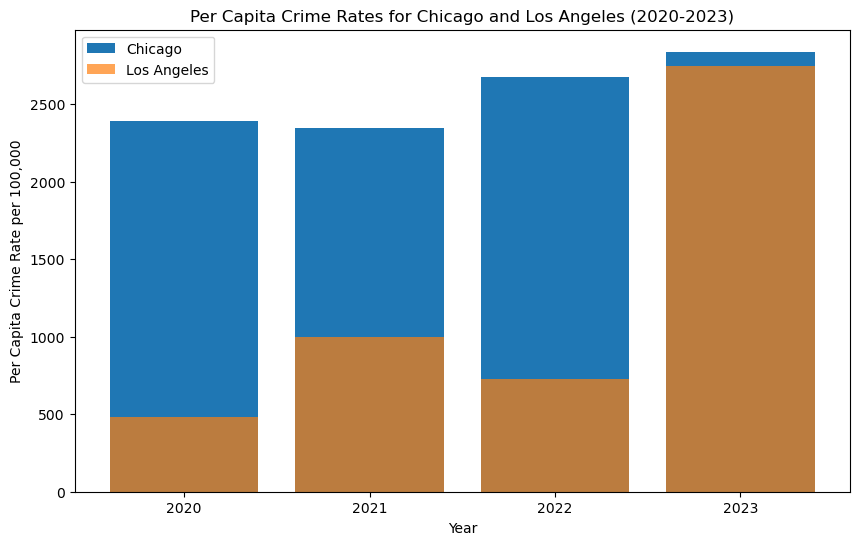

In [50]:
# Taking Chicago and LA population numbers and importing them into a variable 
chicago_population = [8877000, 8901000, 8937000, 8984000]  # Population for 2020, 2021, 2022, 2023 
la_population = [12459000, 12488000, 12534000, 12598000]  # Population for 2020, 2021, 2022, 2023 

# Filter data for the years 2020 through 2023 
df_chi_la_filtered = df_chi_la_combined[df_chi_la_combined['Year'].between(2020, 2023)] 

# Grouping data by 'Year' and counting the number of occurrences 
crime_counts = df_chi_la_filtered.groupby(['Year', 'City']).size().reset_index(name='Crime Count') 

# Pivot the table to have separate columns for Chicago and Los Angeles 
crime_comparison = crime_counts.pivot(index='Year', columns='City', values='Crime Count').reset_index() 

# Calculate per capita crime rates per 100,000 population 
crime_comparison['Chicago Crime Rate per 100,000'] = (crime_comparison['Chicago'] / chicago_population) * 100000 
crime_comparison['Los Angeles Crime Rate per 100,000'] = (crime_comparison['Los Angeles'] / la_population) * 100000 

# Plotting the per capita crime rates for Chicago and Los Angeles 
plt.figure(figsize=(10, 6)) 
plt.bar(crime_comparison['Year'], crime_comparison['Chicago Crime Rate per 100,000'], label='Chicago') 
plt.bar(crime_comparison['Year'], crime_comparison['Los Angeles Crime Rate per 100,000'], label='Los Angeles', alpha=0.7) 

# Adding labels and title 
plt.xlabel('Year') 
plt.ylabel('Per Capita Crime Rate per 100,000') 
plt.title('Per Capita Crime Rates for Chicago and Los Angeles (2020-2023)') 

# Adding legend 
plt.legend() 

# Setting x-axis ticks to display rounded years 
plt.xticks([2020, 2021, 2022, 2023]) 

# Displaying the plot 
plt.show() 

The analysis reveals that Chicago consistently exhibited higher crime rates per 100,000 residents compared to Los Angeles over the specified period, with both cities showing fluctuations in crime rates across the years, and Los Angeles experiencing a notable increase in 2023. Consideration of factors like population density and socioeconomic conditions is crucial for a comprehensive understanding of these findings.

### Question 2: Uncover trends in specific types of crimes, identifying patterns of increase or decrease over the years.

Let's dive into crime trends in Chicago and Los Angeles! We'll start by comparing overall crime rates from 2020 to 2023, giving us a snapshot of the initial patterns. Then, we'll zoom in to spot any increases or decreases in specific types of crimes over the years. Join me on this journey through the data as we uncover the stories it holds.

The code below integrates population data with crime statistics for Chicago and Los Angeles from 2020 to 2023, calculating and comparing per capita crime rates per 100,000 population and presenting the result in a merged DataFrame.

In [51]:
# Top ten crime types in Chicago 
top_chi_crime_types = df_chi_la_combined[df_chi_la_combined['City'] == 'Chicago']['Crime Type'].value_counts().nlargest(10) 

# Top ten crime types in Los Angeles 
top_la_crime_types = df_chi_la_combined[df_chi_la_combined['City'] == 'Los Angeles']['Crime Type'].value_counts().nlargest(10) 

# Displaying the results 
print("Top ten crime types in Chicago:") 
print(top_chi_crime_types) 

print("\nTop ten crime types in Los Angeles:") 
print(top_la_crime_types) 

Top ten crime types in Chicago:
Crime Type
THEFT                  192896
BATTERY                166215
CRIMINAL DAMAGE        106630
ASSAULT                 81525
MOTOR VEHICLE THEFT     70642
DECEPTIVE PRACTICE      68165
OTHER OFFENSE           56282
ROBBERY                 35572
WEAPONS VIOLATION       34650
BURGLARY                30289
Name: count, dtype: int64

Top ten crime types in Los Angeles:
Crime Type
MOTOR VEHICLE THEFT                               155606
THEFT                                             120067
VANDALISM                                          53335
BATTERY                                            52188
OTHER                                              51362
PROSTITUTION                                       38930
BURGLARY                                           37120
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     36411
ROBBERY                                            22057
CRIMINAL THREATS                                   13265
Name: count, 

The below code will create a bar chart that compares the top ten crime types for both Chicago and Los Angeles. 

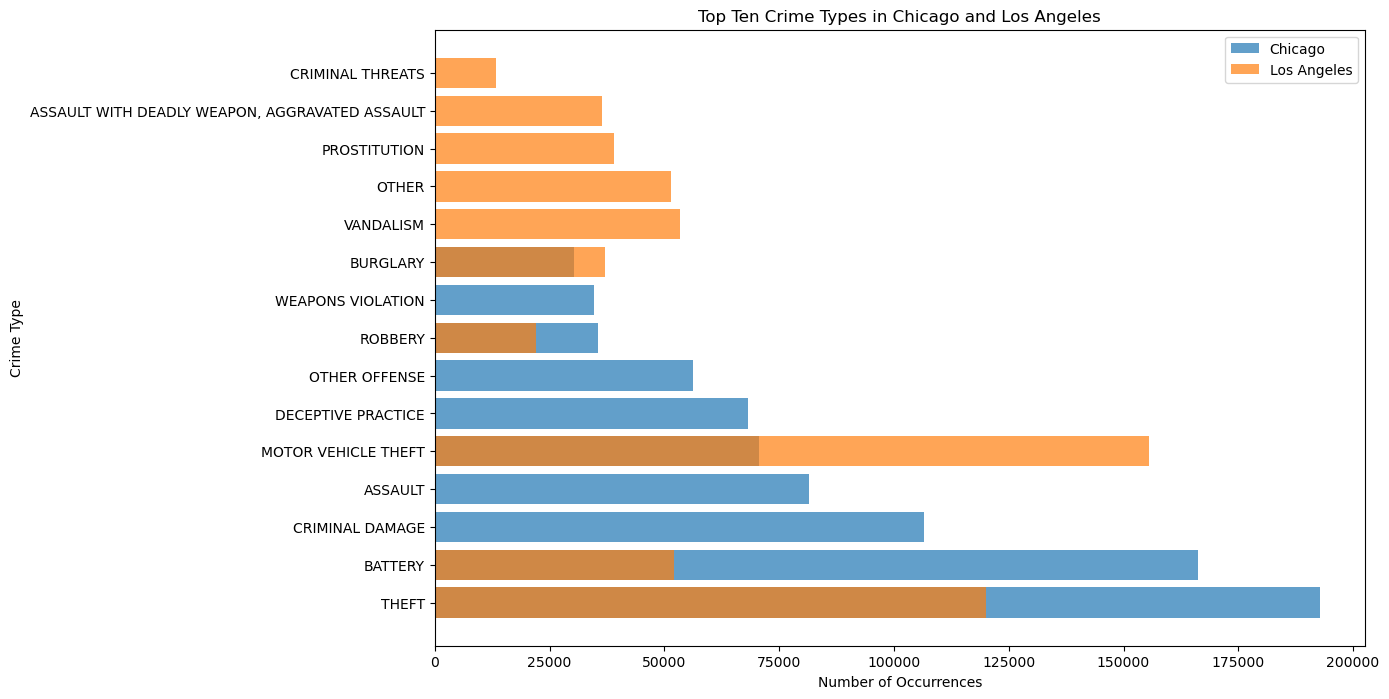

In [52]:
# Plotting the horizontal bar chart 
plt.figure(figsize=(12, 8)) 
plt.barh(top_chi_crime_types.index, top_chi_crime_types, label='Chicago', alpha=0.7) 
plt.barh(top_la_crime_types.index, top_la_crime_types, label='Los Angeles', alpha=0.7) 

# Adding labels and title 
plt.xlabel('Number of Occurrences') 
plt.ylabel('Crime Type') 
plt.title('Top Ten Crime Types in Chicago and Los Angeles') 

# Adding a legend 
plt.legend() 

# Displaying the plot 
plt.show() 

For ease of viewing, I have selected to showcase the top 3 crime types for both Chicago and Los Angeles for the years 2020 - 2023. The code, provided below, meticulously identifies and displays the most prevalent crime categories in each city. Subsequently, it visualizes the yearly trend analysis for each of the top 3 crime types, unraveling patterns and variations in criminal activity over the specified timeframe. The resulting line plot utilizes markers to distinctly represent occurrences, offering a comprehensive perspective on how these selected crime types have evolved in both Chicago and Los Angeles.

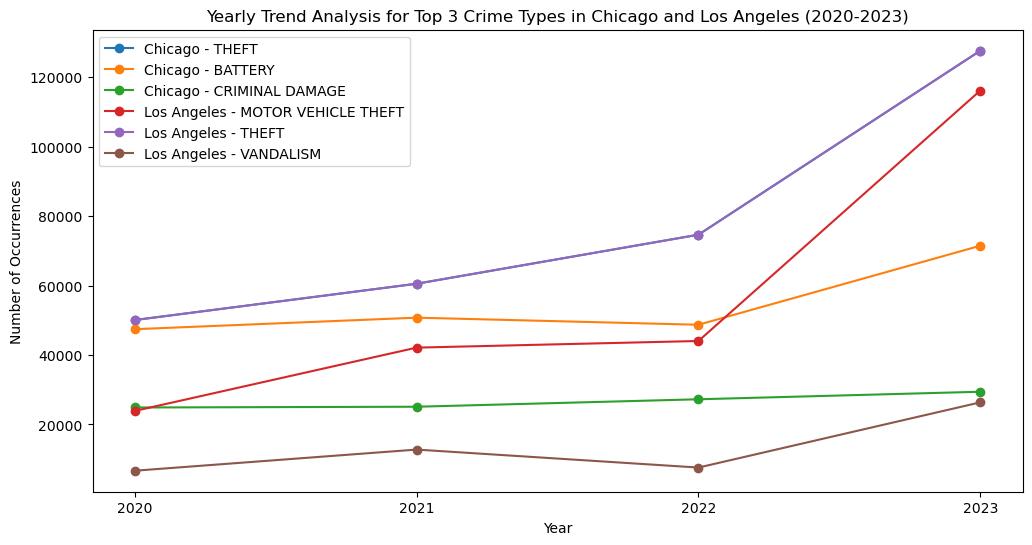

In [53]:
# Get the top 3 crime types for Chicago 
top3_chi_crime_types = df_chi_la_combined[df_chi_la_combined['City'] == 'Chicago']['Crime Type'].value_counts().nlargest(3) 

# Get the top 3 crime types for Los Angeles 
top3_la_crime_types = df_chi_la_combined[df_chi_la_combined['City'] == 'Los Angeles']['Crime Type'].value_counts().nlargest(3) 

# Plotting the yearly trend analysis for the top 3 crime types 
plt.figure(figsize=(12, 6)) 

# Chicago 
for crime_type in top3_chi_crime_types.index: 
    chi_data = df_chi_la_combined[(df_chi_la_combined['Crime Type'] == crime_type) & df_chi_la_combined['Year'].between(2020, 2023)] 
    chi_data_grouped = chi_data.groupby('Year').size() 
    plt.plot(chi_data_grouped.index, chi_data_grouped, label=f'Chicago - {crime_type}', marker='o') 

# Los Angeles 
for crime_type in top3_la_crime_types.index: 
    la_data = df_chi_la_combined[(df_chi_la_combined['Crime Type'] == crime_type) & df_chi_la_combined['Year'].between(2020, 2023)] 
    la_data_grouped = la_data.groupby('Year').size() 
    plt.plot(la_data_grouped.index, la_data_grouped, label=f'Los Angeles - {crime_type}', marker='o') 

# Adding labels and title 
plt.xlabel('Year') 
plt.ylabel('Number of Occurrences') 
plt.title('Yearly Trend Analysis for Top 3 Crime Types in Chicago and Los Angeles (2020-2023)') 

# Adding legend 
plt.legend() 

# Setting x-axis ticks as whole numbers 
plt.xticks(np.arange(2020, 2024, 1)) 

# Displaying the plot 
plt.show() 

Due to discrepancies in how Los Angeles categorizes crime types, there are numerous conflicting categories that may correspond to comparable crimes in the Chicago dataset. This presents a limitation in the analysis. Nevertheless, similarities in the top 10 crimes per city are apparent. Examining the trend in the top 3 crimes over a three-year period reveals a distinct pattern. It's important to highlight that Chicago labels Vandalism as Criminal Damage.

### Question 3: Utilize spatial analysis to identify and map crime hotspots in both cities, discerning areas with consistently high crime rates.

In an attempt to answer this question I'd like to use a the coordinates from each dataset to build a heatmap displaying where crimes are at the heaviest.

The code below creates seperate interactive heatmaps for Chicago and Los Angeles using Folium. It uses the HeatMap plugin to visualize the density of points.

In [54]:
# Chicago Map 
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)  # Chicago's coordinates 

# Add HeatMap layer for Chicago 
HeatMap(df_chi_la_combined[df_chi_la_combined['City'] == 'Chicago'][['Latitude', 'Longitude']].dropna(), radius=10).add_to(chicago_map) 
chicago_map.save("chicago_heatmap.html") 

# Los Angeles Map 
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)  # LA's coordinates 

# Add HeatMap layer for Los Angeles 
HeatMap(df_chi_la_combined[df_chi_la_combined['City'] == 'Los Angeles'][['Latitude', 'Longitude']].dropna(), radius=10).add_to(la_map) 
la_map.save("la_heatmap.html") 

The code below creates an interactive embedded frame of Chicago directly in our Jupyter notebook.

In [55]:
# Display Chicago HeatMap 
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)  # Chicago's coordinates 
HeatMap(df_chi_la_combined[df_chi_la_combined['City'] == 'Chicago'][['Latitude', 'Longitude']].dropna(), radius=10).add_to(chicago_map) 
chicago_map.save("chicago_heatmap.html") 
IFrame("chicago_heatmap.html", width=800, height=600) 

The code below creates an interactive embedded frame of Los Angeles directly in our Jupyter notebook.

In [56]:
# Display Los Angeles HeatMap 
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)  # LA's coordinates 
HeatMap(df_chi_la_combined[df_chi_la_combined['City'] == 'Los Angeles'][['Latitude', 'Longitude']].dropna(), radius=10).add_to(la_map) 
la_map.save("la_heatmap.html") 
IFrame("la_heatmap.html", width=800, height=600) 

Without diving in and familiarizing myself with both cities districts a lot more these maps almost serve more of a general location purpose. Perhaps someone familair with the areas could use these to to explore solutions for crimes.

<a id='conclusions'></a>
## Conclusion: 

This data analytics exploration into crime patterns in Chicago and Los Angeles unveils significant insights, providing a nuanced understanding of the dynamics within these two major cities. 

### Key Findings: 

**1. Crime Rate Comparison:** 
- Chicago consistently exhibited higher crime rates than Los Angeles up to 2023, with a notable surge in Los Angeles' crime rate during that period. 

**2. Trend Analysis:** 
- Despite discrepancies in crime type categorization, similarities in the top 10 crimes per city are apparent. Examining the trend in the top 3 crimes over a three-year period reveals distinct patterns. 

**3. Hotspots:** 
- Spatial analysis identified general crime locations; however, further exploration is needed to understand specific districts and formulate targeted interventions. 

### Methodology: 

By employing statistical analysis, data visualization, and spatial mapping, this analysis ensures a comprehensive exploration of crime data. Meticulous cleaning and standardization of datasets lay the groundwork for robust investigation. Time-series analysis, crime category trends, and hotspot mapping contribute actionable insights for public safety enhancement. 

### Significance: 

This project illuminates crime dynamics, offering a nuanced understanding of patterns and trends in diverse urban landscapes. Addressing specific objectives related to crime rate comparisons, trend analyses, and hotspot identification, the aim is to empower policymakers, law enforcement agencies, and communities to collaboratively work towards safer environments. 

Our commitment is rooted in delivering a data-driven analysis characterized by integrity, statistical rigor, and a dedication to uncovering insights that contribute to informed decision-making in matters of public safety and law enforcement. 

<a id='limits'></a>
## Limitations

### Limitation 1:

One limitation I encountered during the analysis was the Crime Type column in the Los Angeles dataframe. While exploring the Chicago dataset initially, I found consistency in the layout of crime types and descriptions. However, in the LA dataframe, crime types and descriptions were combined, and the structure wasn't as consistent as in the Chicago dataset. Due to limited time and resources, I made decisions based on minimal research to modify categories, aligning them with the Chicago dataframe for a more coherent analysis presentation. 

### Limitation 2:

When comparing overall crimes in response to my initial question, I realized the need for population data as a third pillar in this project for a per capita comparison. To address this, I obtained population data directly from Census data. Given more time, it would be best practice to incorporate a third dataset containing Census data into the analysis. 